 <챗봇 Miner: Text Mining>  
     
- <b><a href='#the_destination'>1.DB 연동</a></b>
    - <a href='#the_destination1'>1.1 DB 불러오기</a>
    - <a href='#the_destination2'>1.2 DB 인덱스 수정</a>
    
    
- <b><a href='#the_destination3'>2. Text Mining - 품사별 어휘 분석</a></b>
    - <a href='#the_destination4'>2.1 텍스트 불러오기</a>    
    - <a href='#the_destination5'>2.2 명사</a>
        + <a href='#the_destination6'>2.2.1 명사 추출</a>
            - <a href='#the_destination7'>A. 한 자리수 이상 명사 추출</a>           
        - <a href='#the_destination8'>2.2.2 명사 어휘 빈도 및 그래프</a>
            - <a href='#the_destination9'>A. MATPLOTLIB 그래프</a>
            - <a href='#the_destination10'>B. 명사, 빈도수 추출</a>
            - <a href='#the_destination11'>C. 명사, 빈도수 데이터 DataFrame 형식으로 변환</a>
            - <a href='#the_destination12'>D. PLOTLY 그래프</a>
            - <a href='#the_destination13'>E. 워드클라우드</a>
    - 2.3 형용사, 동사
        - 2.3.1 형용사, 동사 어휘 추출
- <b><a href='#the_destination16'>3. Text Mining - 연관성 분석</b>
    - <a href='#the_destination17'>3.1 KOMORAN
        - <a href='#the_destination18'>3.1.1KOMORAN 형태소 분석
        - <a href='#the_destination19'>3.1.2 KOMORAN 명사 추출
        - <a href='#the_destination20'>3.1.3 KOMORAN 명사 빈도수 추출
        - <a href='#the_destination21'>3.1.4 KOMORAN 시각화
        - <a href='#the_destination22'>3.1.5 Unique한 명사 리스트 만들기
        - <a href='#the_destination23'>3.1.6 문장-단어 행렬
        - <a href='#the_destination24'>3.1.7 공존 단어 행렬 계산
        - <a href='#the_destination25'>3.1.8 네트워크 그래프
    - <a href='#the_destination26'>3.2 TWITTER
        - <a href='#the_destination27'>3.2.1 TWITTER 형태소 분석
    - <a href='#the_destination28'>3.2.2 TWITTER 명사 추출
    - <a href='#the_destination29'>3.2.3 TWITTER 명사 빈도수 추출
    - <a href='#the_destination30'>3.2.4 TWITTER 시각화
    - <a href='#the_destination31'>3.2.5 Unique한 명사 리스트 만들기
    - <a href='#the_destination32'>3.2.6 문자-단어 행렬
    - <a href='#the_destination33'>3.2.7 공존-단어 행렬 계산
    - <a href='#the_destination34'>3.2.8 네트워크 그래프
- <b>4. 감성분석</b>
    - 4.1긍부정 트랜드 출력

<a id='the_destination'></a>

# 1.DB 연동
- 1.1 DB 불러오기
- 1.2 DB 인덱스 수정

<a id='the_destination1'></a>
## 1.1 DB 불러오기

In [162]:
import pymysql.cursors
import numpy as np
conn = pymysql.connect(host='169.56.124.93', user='airchat' , password='airchat1234', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor) # Connection 으로부터 Dictoionary Cursor 생성

sql='SELECT CHAT_CNVRS_ID as ID,substr(CHAT_SEND_DTS,1,14) as date, substr(CHAT_SEND_DTS,1,14) as date_index ,CHAT_SEND_TEXT as text, CHAT_CONFI_RATE as conf from airchat.ICHAT_LOG where CHAT_CONFI_RATE > 0   '
a=curs.execute(sql)#쿼리문에 의해 디비를 불러옴

db=curs.fetchall()
#print(float(a))

#rows=curs.fetchall()

#avg=np.mean(rows)
#print(rows)

conn.close()

In [163]:
import pandas as pd
from pandas import Series, DataFrame
db1=DataFrame(db)

db1['datetime']=db1['date_index'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))  #db1에 datetime 이라는 index를 설정해주기 위해 datetime 이라는 열을 설정
#  .apply(lambda x: ~~~ 의 의미는  내가 x를 다룰 건데, ~~~ 이런식으로 할꺼야 라는 뜻
# %Y%m%d 형식으로 된 X를 pandas의 to_datetime 함수를 통해 datetime object로 변환
db1['message_num']=1   #메세지 수를 합산하기 위해 만든 컬럼
db1.set_index(db1['datetime'], inplace=True)  #datetime 컬럼을 index로 만듬 

db1=db1.drop('datetime',1)  #기존에 만들었던 datetime 컬럼을 삭제
db1=db1.drop('date_index', 1)
db1=db1.drop('date', 1)
db1.head(50)

,ID,conf,text,message_num
datetime,,,,
2018-02-13 15:23:53,00003864-41fd-4d2a-9d5a-a66a6f071036,1.00000000000000000000,주차장 위치,1
2018-02-21 14:22:10,000dae65-1e6e-4b5c-80c5-a8c514c7030d,0.65861263275146490000,눈이 아파,1
2018-03-05 17:06:56,00288665-5f3d-4733-8d97-1c694967f823,0.30894076824188230000,정시 경쟁률보기,1
2018-02-26 19:26:38,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,대학안내,1
2018-02-26 19:26:42,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.90597867965698240000,셔틀 시간,1
2018-02-26 19:26:44,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,2호선 잠실역,1
2018-01-14 14:11:56,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1
2018-01-14 14:11:56,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1
2018-02-06 10:44:02,00a3a5a7-ca1b-4c6e-9e7e-c534c2120db2,1.00000000000000000000,진료 연락처,1


<a id='the_destination2'></a>
## 1.2 DB 인덱스 수정

In [164]:
import pymysql.cursors
import numpy as np
conn = pymysql.connect(host='169.56.124.93', user='airchat' , password='airchat1234', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor) # Connection 으로부터 Dictoionary Cursor 생성


sql='select CHAT_CNVRS_ID as ID, timestampdiff(second, FRST_CONN_DTM, LAST_CONN_DTM) as stay_sec, FRST_CONN_DTM as date from airchat.ICHAT_CONN_STAT'
#sql='SELECT DISTINCT CHAT_CNVRS_ID as ID ,substr(CHAT_SEND_DTS,1,8) as date from chat.ICHAT_LOG where CHAT_CONFI_RATE > 0  '
a=curs.execute(sql)#쿼리문에 의해 디비를 불러옴

con_ID=curs.fetchall()
#print(float(a))

#rows=curs.fetchall()

#avg=np.mean(rows)
#print(rows)

conn.close()

In [165]:
con_ID1=DataFrame(con_ID)

con_ID1['datetime']=con_ID1['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))  #db1에 datetime 이라는 index를 설정해주기 위해 datetime 이라는 열을 설정
#  .apply(lambda x: ~~~ 의 의미는  내가 x를 다룰 건데, ~~~ 이런식으로 할꺼야 라는 뜻
# %Y%m%d 형식으로 된 X를 pandas의 to_datetime 함수를 통해 datetime object로 변환
con_ID1['user_num']=1   #메세지 수를 합산하기 위해 만든 컬럼
con_ID1.set_index(con_ID1['datetime'], inplace=True)  			#datetime 컬럼을 index로 만듬 

con_ID1=con_ID1.drop('datetime',1)  							#기존에 만들었던 datetime 컬럼을 삭제
df=pd.merge(db1,con_ID1,how='left')
df.head(50) 													##50개만

,ID,conf,text,message_num,date,stay_sec,user_num
0,00003864-41fd-4d2a-9d5a-a66a6f071036,1.00000000000000000000,주차장 위치,1,20180213152343,10.0,1.0
1,000dae65-1e6e-4b5c-80c5-a8c514c7030d,0.65861263275146490000,눈이 아파,1,20180221142207,3.0,1.0
2,00288665-5f3d-4733-8d97-1c694967f823,0.30894076824188230000,정시 경쟁률보기,1,20180305170648,12.0,1.0
3,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,대학안내,1,20180226192636,8.0,1.0
4,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.90597867965698240000,셔틀 시간,1,20180226192636,8.0,1.0
5,003d49cd-cc9b-4b98-9707-24afd918f5b5,0.30521347522735600000,2호선 잠실역,1,20180226192636,8.0,1.0
6,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1,20180114141115,42.0,1.0
7,004a119e-b9bd-4ed1-b1bc-1ace20b1e170,1.00000000000000000000,안녕,1,20180114141115,42.0,1.0
8,00a3a5a7-ca1b-4c6e-9e7e-c534c2120db2,1.00000000000000000000,진료 연락처,1,20180206104358,7.0,1.0
9,0131665b-e803-49cf-b83c-78799dbde573,0.30268753767013550000,대학안내,1,20180312163239,1.0,1.0


 <a id='the_destination3'></a>
   
   # 2.Text Mining_품사별 어휘 분석
   
- 토큰화(tokenization) : 토큰화란 말뭉치를 작은 구성 요소(문장, 단어, 형태소 등)를 단위로 나누는 것을 의미한다.
    - 문장 단위 토큰화(sentence tokenization)
    - 단어 단위 토큰화(word tokenization)
    - 형태소 단위 토큰화   
   
   
   

- 한국어 품사 태그표(konlpy)
    - https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0
  
  
  
- KonlPy에는 서로 다른 형태소 분석기 5개가 내장되어 있다.
    - Kkma, Twitter, Komoran, Hannanum, Mecab
    - 이 중 Mecab은 리눅스에서만 사용 가능하므로, 실제로 4가지의 형태소 분석기를 사용 가능하다.
    - 주로 Twitter 형태 분석기를 사용한다.
    - 서로 다른 형태소 분석기는 서로 다른 결과를 가져온다.
    - 속도 뿐만 아니라 품사 태깅 결과도 다르다.  

<a id='the_destination4'></a>
## 2.1 텍스트 불러오기

In [166]:
df['text']													#df테이블에서 text 가져오기
dff = df['text']											#df['text']=dff로
dff.head(50)												#상위 데이터 50개 추출

0                주차장 위치
1                 눈이 아파
2              정시 경쟁률보기
3                  대학안내
4                 셔틀 시간
5               2호선 잠실역
6                    안녕
7                    안녕
8                진료 연락처
9                  대학안내
10                 대학안내
11               식당 연락처
12                생활관식당
13                   시험
14                 감염내과
15                   위치
16                병원 안내
17                   위치
18                   병원
19              종양내과 위치
20                  무엇을
21    챗봇으로 무엇을 할 수 있나요?
22                   챗봇
23                진료 안내
24                진료 예약
25             2. 진료 예약
26                진료 예약
27               3호선 위치
28                 제1전공
29                 변경정보
30               진료 연락처
31                 감염내과
32                   성적
33                   성적
34                경쟁률보기
35                경쟁률보기
36          학생부종합 경쟁률보기
37                    예
38                  아니오
39                  아니오
40                진료 시간
41              

<a id='the_destination5'></a>
## 2.2 명사 

<a id='the_destination6'></a>
### 2.2.1 명사 추출

In [167]:
brother_tae_change = str(list(df['text'])) 								#list화
import nltk 															#텍스트 분석을 위한 nltk 모듈 불러오기
from konlpy.tag import Twitter 											#konlpy 패키지로부터 Twitter를 불러옴
t = Twitter()

noun_comehere = t.nouns(brother_tae_change)   							#명사 추출
noun_comehere 

['주차장',
 '위치',
 '눈',
 '정시',
 '경쟁률',
 '보기',
 '대학',
 '안내',
 '셔틀',
 '시간',
 '호선',
 '잠실역',
 '안녕',
 '안녕',
 '진료',
 '연락처',
 '대학',
 '안내',
 '대학',
 '안내',
 '식당',
 '연락처',
 '생활관',
 '식당',
 '시험',
 '감염',
 '내과',
 '위치',
 '병원',
 '안내',
 '위치',
 '병원',
 '종양',
 '내과',
 '위치',
 '무엇',
 '챗봇',
 '무엇',
 '수',
 '챗봇',
 '진료',
 '안내',
 '진료',
 '예약',
 '진료',
 '예약',
 '진료',
 '예약',
 '호선',
 '위치',
 '제',
 '전공',
 '변경',
 '정보',
 '진료',
 '연락처',
 '감염',
 '내과',
 '성적',
 '성적',
 '경쟁률',
 '보기',
 '경쟁률',
 '보기',
 '학생',
 '부',
 '종합',
 '경쟁률',
 '보기',
 '예',
 '진료',
 '시간',
 '가정의학',
 '대학',
 '안내',
 '셔틀',
 '위치',
 '학사',
 '안내',
 '호선',
 '신촌역',
 '셔틀',
 '연락처',
 '셔틀',
 '위치',
 '호선',
 '불광역',
 '셔틀',
 '연락처',
 '학사',
 '안내',
 '학사',
 '안내',
 '학사',
 '안내',
 '대학',
 '안내',
 '병원',
 '안내',
 '위치',
 '주차장',
 '병원',
 '주차장',
 '진료',
 '위치',
 '류마티스',
 '내과',
 '진료',
 '위치',
 '가정의학',
 '진료',
 '시간',
 '감염',
 '내과',
 '가정의학',
 '예',
 '진료',
 '시간',
 '재활',
 '병원',
 '재활',
 '의학과',
 '대학',
 '생활',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '생활',
 '안내',
 '식당',
 '위치',
 

<a id='the_destination7'></a>
<b> 한 자리수 이상의 명사 추출 </b>

In [168]:
noun_comehere1 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
noun_comehere1

['주차장',
 '위치',
 '정시',
 '경쟁률',
 '보기',
 '대학',
 '안내',
 '셔틀',
 '시간',
 '호선',
 '잠실역',
 '안녕',
 '안녕',
 '진료',
 '연락처',
 '대학',
 '안내',
 '대학',
 '안내',
 '식당',
 '연락처',
 '생활관',
 '식당',
 '시험',
 '감염',
 '내과',
 '위치',
 '병원',
 '안내',
 '위치',
 '병원',
 '종양',
 '내과',
 '위치',
 '무엇',
 '챗봇',
 '무엇',
 '챗봇',
 '진료',
 '안내',
 '진료',
 '예약',
 '진료',
 '예약',
 '진료',
 '예약',
 '호선',
 '위치',
 '전공',
 '변경',
 '정보',
 '진료',
 '연락처',
 '감염',
 '내과',
 '성적',
 '성적',
 '경쟁률',
 '보기',
 '경쟁률',
 '보기',
 '학생',
 '종합',
 '경쟁률',
 '보기',
 '진료',
 '시간',
 '가정의학',
 '대학',
 '안내',
 '셔틀',
 '위치',
 '학사',
 '안내',
 '호선',
 '신촌역',
 '셔틀',
 '연락처',
 '셔틀',
 '위치',
 '호선',
 '불광역',
 '셔틀',
 '연락처',
 '학사',
 '안내',
 '학사',
 '안내',
 '학사',
 '안내',
 '대학',
 '안내',
 '병원',
 '안내',
 '위치',
 '주차장',
 '병원',
 '주차장',
 '진료',
 '위치',
 '류마티스',
 '내과',
 '진료',
 '위치',
 '가정의학',
 '진료',
 '시간',
 '감염',
 '내과',
 '가정의학',
 '진료',
 '시간',
 '재활',
 '병원',
 '재활',
 '의학과',
 '대학',
 '생활',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '안내',
 '식당',
 '시간',
 '진료',
 '예약',
 '대학',
 '생활',
 '안내',
 '식당',
 '위치',
 '알려줭',
 '식당',
 '위치',
 '알려줭',
 '대학',


<a id='the_destination8'></a>
### 2.2.2 명사어휘 빈도 및 그래프

In [169]:
ko = nltk.Text(noun_comehere1) 																#noun_comehere1을 tokenize한다
ko

<Text: 주차장 위치 정시 경쟁률 보기 대학 안내 셔틀...>

<a id='the_destination9'></a>
#### A. MATPLOTLIB 그래프

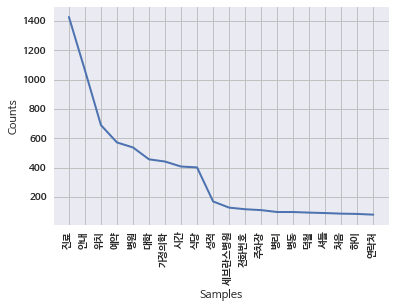

In [170]:
from matplotlib import pylab 																#matplotlib패키지에서 pylab 모듈을 불러옴
from matplotlib import font_manager, rc 													#matplotlib패티지에서 font_manager, rc를 불러옴
font_fname = 'C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumBarunGothic.ttf' 		#폰트 지정
font_name = font_manager.FontProperties(fname=font_fname).get_name() 
rc('font', family=font_name)


ko.plot(20) 																				#상위 20개 그래프 그리기

<a id='the_destination10'></a>
#### B. 명사, 빈도수 추출

In [171]:
ko50 = ko.vocab().most_common(50) 														#단어와 빈도수 상위 50개
ko50

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 571),
 ('병원', 537),
 ('대학', 456),
 ('가정의학', 441),
 ('시간', 407),
 ('식당', 401),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('병리', 97),
 ('병동', 97),
 ('덕철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('하이', 84),
 ('연락처', 79),
 ('생활', 67),
 ('내과', 66),
 ('호선', 64),
 ('정보', 53),
 ('경쟁률', 51),
 ('보기', 51),
 ('센터', 50),
 ('재활', 49),
 ('강희', 49),
 ('클리', 46),
 ('의료', 45),
 ('감염', 41),
 ('심장', 39),
 ('알려줭', 38),
 ('소개', 37),
 ('기타', 37),
 ('상세', 36),
 ('방가', 35),
 ('어린이병원', 35),
 ('서비스', 32),
 ('시험', 31),
 ('안녕', 30),
 ('선택', 30),
 ('외과', 29),
 ('연세', 27),
 ('학사', 26),
 ('이비인후과', 26),
 ('전화', 26),
 ('챗봇', 25),
 ('등급', 23)]

<a id='the_destination11'></a>
#### C. 명사 빈도수 데이터 DB로 변환

In [172]:
brother_tae_change = str(list(df['text'])) 														#2.2.1 반복

import nltk
from konlpy.tag import Twitter
t = Twitter()
noun_comehere = t.nouns(brother_tae_change) 
noun_comehere
noun_comehere1 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
noun_comehere1
ko = nltk.Text(noun_comehere1)


ko10=ko.vocab().most_common(10)
db1= DataFrame(ko10) 																			#상위 10개 dataframe화 => for plotly 그래프
db1[[0,]]

,0
0,진료
1,안내
2,위치
3,예약
4,병원
5,대학
6,가정의학
7,시간
8,식당
9,성적



<a id='the_destination12'></a>
#### D. PLOTLY 그래프

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
#막대그래프o


py.sign_in('simwooinfunnywork','cGhAtiBeOsd3YTlm5xZQ')

data = [
    go.Bar(
        x=db1[0],
        y=db1[1],
        name='Top10',
        marker=dict(
        color='rgb(204,204,204)',
    ))
        ] 
layout = plotly.graph_objs.Layout(
    title='TOP 10 Bar-chart'
)
 
figure = plotly.graph_objs.Figure(
    data=data, layout=layout
)
 

py.iplot(figure, filename='basic_bar_chart.html')

<a id='the_destination13'></a>
#### E. 워드 클라우드

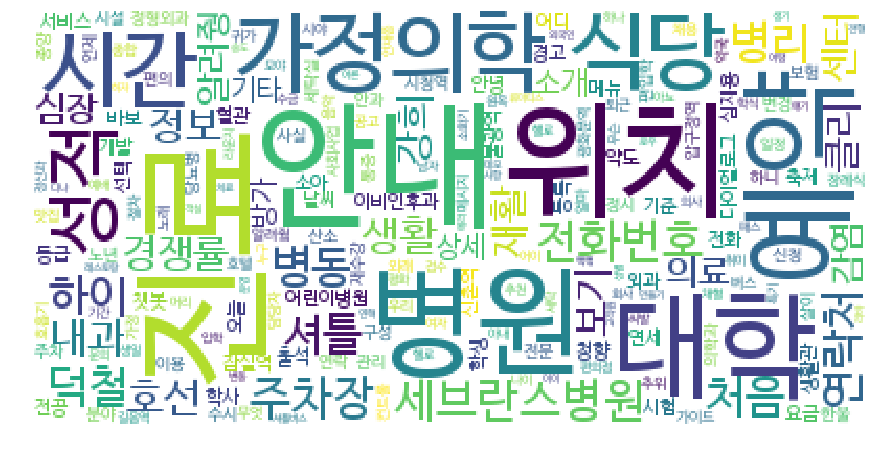

In [174]:
data = ko.vocab().most_common(500)
tmp_data = dict(data)
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumBarunGothic.ttf',
                       relative_scaling = 0.2,
                       background_color='white',
                      ).generate_from_frequencies(tmp_data)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<a id='the_destination14'></a>
   ## 2.3 형용사, 동사 

<a id='the_destination15'></a>
###  2.3.1 형용사, 동사 어휘 추출

 <a id='the_destination16'></a>   
       
# 3. Text Mining_연관성 분석

<a id='the_destination17'></a>
## 3.1 KOMORAN

<a id='the_destination18'></a>
### 3.1.1 KOMORAN 형태소 분석

In [175]:
#2.1에서 dff 데이터 사용 예정
#noun_comehere2 = [noun_comehere for noun_comehere in noun_comehere if len(noun_comehere) > 1 ]
#noun_comehere2

lines = list(dff) 													#  dff 리스트화하고 lines이라 칭함

sentences = [line for line in lines if line != '']   				# 빈 문장 제거 후 sentences라 칭함


for line in lines[:10]:  											# for문을 통해 각 줄에 접근한다:10개
    if line != '':
        print(line)

from konlpy.tag import Komoran 										#KOMORAN 모듈 활용
tagger = Komoran()
tags = tagger.pos(sentences[0]) 									#형태소 분석

tagged_sentences = [tagger.pos(sent) for sent in sentences]

tagged_sentences

주차장 위치
눈이 아파
정시 경쟁률보기
대학안내
셔틀 시간
2호선 잠실역
안녕
안녕
진료 연락처
대학안내


[[('주차장', 'NNG'), ('위치', 'NNG')],
 [('눈', 'NNG'), ('이', 'JKS'), ('아프', 'VA'), ('아', 'EC')],
 [('정시', 'NNG'), ('경쟁', 'NNG'), ('률', 'XSN'), ('보', 'VV'), ('기', 'ETN')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('셔틀', 'NNG'), ('시간', 'NNG')],
 [('2호선', 'NNP'), ('잠실역', 'NNP')],
 [('안녕', 'NNG')],
 [('안녕', 'NNG')],
 [('진료', 'NNG'), ('연락처', 'NNG')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('대학', 'NNG'), ('안내', 'NNG')],
 [('식당', 'NNG'), ('연락처', 'NNG')],
 [('생활관', 'NNG'), ('식당', 'NNG')],
 [('시험', 'NNG')],
 [('감염', 'NNG'), ('내과', 'NNG')],
 [('위치', 'NNG')],
 [('병원', 'NNG'), ('안내', 'NNG')],
 [('위치', 'NNG')],
 [('병원', 'NNG')],
 [('종양', 'NNG'), ('내과', 'NNG'), ('위치', 'NNG')],
 [('무엇', 'NP'), ('을', 'JKO')],
 [('챗봇으로', 'NA'),
  ('무엇', 'NP'),
  ('을', 'JKO'),
  ('하', 'VV'),
  ('ㄹ', 'ETM'),
  ('수', 'NNB'),
  ('있', 'VX'),
  ('나요', 'EF'),
  ('?', 'SF')],
 [('챗봇', 'NA')],
 [('진료', 'NNG'), ('안내', 'NNG')],
 [('진료', 'NNG'), ('예약', 'NNG')],
 [('2', 'SN'), ('.', 'SF'), ('진료', 'NNG'), ('예약', 'NNG')],
 [('진료', 'NNG'), ('예약', 'N

<a id='the_destination19'></a>
### 3.1.2 KOMORAN 명사 추출
명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트

In [176]:
noun_list = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list[:10]

['주차장', '위치', '눈', '정시', '경쟁', '대학', '안내', '셔틀', '시간', '2호선']

<a id='the_destination20'></a>
### 3.1.3 KOMORAN 명사 빈도수 추출
collection library를 이용하여 빈도수 계산하기

In [177]:
from collections import Counter

noun_counts = Counter(noun_list)
noun_counts.most_common(50)

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 583),
 ('병원', 537),
 ('예', 501),
 ('대학', 456),
 ('시간', 407),
 ('식당', 401),
 ('가정의학과', 378),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('병동', 97),
 ('병리', 96),
 ('덕', 93),
 ('철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('연락처', 79),
 ('생활', 67),
 ('가정의학', 63),
 ('내과', 61),
 ('정보', 53),
 ('경쟁', 51),
 ('센터', 50),
 ('재활', 49),
 ('강', 49),
 ('희철', 49),
 ('클리닉', 46),
 ('의료진', 42),
 ('감염', 41),
 ('심장', 39),
 ('소개', 37),
 ('기타', 37),
 ('어린이병원', 35),
 ('서비스', 32),
 ('안', 32),
 ('시험', 31),
 ('선택', 30),
 ('2호선', 29),
 ('안녕', 29),
 ('외과', 28),
 ('연세', 27),
 ('암', 27),
 ('학사', 26),
 ('이비인후과', 26),
 ('전화', 26),
 ('3호선', 25)]

<a id='the_destination21'></a>
### 3.1.4 KOMORAN 시각화
결과를 시각화 하기 위한 Matplotlib

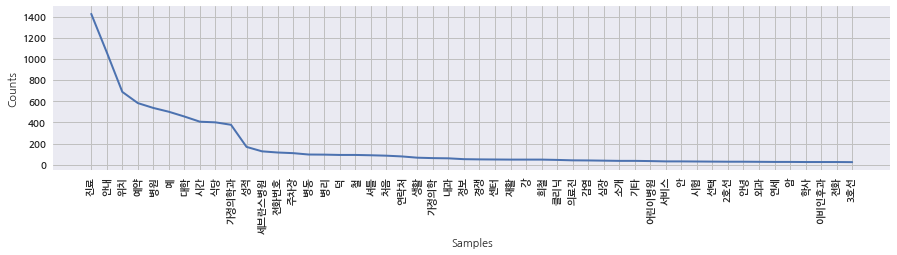

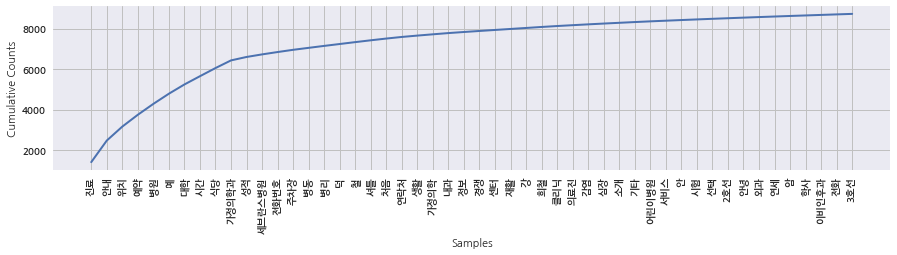

In [178]:
import nltk
import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
path = 'C:/Anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(noun_counts)

plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

<a id='the_destination22'></a>
### 3.1.5 Unique한 명사 리스트 만들기


In [179]:
unique_nouns = set() 													# Unique한 명사 리스트 만들기
unique_list = []     													# 문장을 담기 위한 리스트를 생성한다

for sent in tagged_sentences: 
    for word, tag in sent: 												# tags의 (단어, 태그)쌍을 하나씩 꺼낸다:
        if tag in ['NNP','NNG']: 										# 만약 tag가 명사면
            if word not in unique_list: 								# 태그를 리스트에 첨부
                unique_list.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent: 												# tags의 (단어, 태그)쌍을 하나씩 꺼낸다:
        if tag in ['NNP', 'NNG']: 										# 만약 tag가 명사면
            unique_nouns.add(word) 										# set에 명사 첨부

unique_nouns = list(unique_nouns) 										# uniqueNouns 셋을 리스트로 변환한다
noun_index = {noun: i for i, noun in enumerate(unique_nouns)} 			# numerate 함수로 각 명사의 index를 지정한다 - 딕셔너리 형태의 자료구조
noun_index

{'1호선': 100,
 '2호선': 114,
 '3호선': 287,
 '5호선': 132,
 '가방': 63,
 '가이드': 117,
 '가정': 84,
 '가정의학': 36,
 '가정의학과': 102,
 '감': 234,
 '감기': 212,
 '감사': 216,
 '감염': 66,
 '갑상선': 245,
 '강': 95,
 '개발': 90,
 '객실': 122,
 '검사실': 126,
 '경고': 274,
 '경쟁': 260,
 '고랑': 24,
 '고마워요': 200,
 '고맙습니다': 2,
 '공고': 123,
 '관리': 71,
 '광화문역': 241,
 '교직원': 110,
 '교통수단': 147,
 '구성': 148,
 '굿': 179,
 '귀': 55,
 '기간': 0,
 '기능': 229,
 '기준': 34,
 '기타': 17,
 '길': 251,
 '길음역': 205,
 '나이': 250,
 '날': 42,
 '날씨': 3,
 '날짜': 15,
 '남자': 130,
 '내과': 285,
 '내일': 233,
 '노': 206,
 '노년': 49,
 '노래': 1,
 '뇨': 111,
 '눈': 109,
 '뉴스': 51,
 '다나와': 281,
 '다이얼로그': 258,
 '담당자': 78,
 '당뇨병': 261,
 '대학': 158,
 '덕': 88,
 '데모': 182,
 '도서관': 155,
 '동문서답': 31,
 '등급': 76,
 '등록': 16,
 '땡': 223,
 '땡큐': 35,
 '라운지': 193,
 '러': 273,
 '레': 201,
 '레스토랑': 159,
 '롱': 228,
 '류마티스': 128,
 '말': 116,
 '맛집': 139,
 '맨': 208,
 '머리': 181,
 '멍청이': 118,
 '메': 174,
 '메뉴': 77,
 '메시지': 83,
 '모야': 284,
 '문': 91,
 '뭐': 11,
 '바보': 168,
 '방': 256,
 '방가': 125,
 '방법': 227,
 '방학':

<a id='the_destination23'></a>
### 3.1.6 문장-단어 행렬
문장 길이 X 명사 종류 matrix 생성

In [180]:
import numpy as np
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)]) 				# [(문장의 개수) X (unique한 명사의 개수)]크기의 0으로 이루어진 행렬을 생성한다
np.shape(occurs)

(6876, 295)

In [181]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']: 											#만약 태그가 명사면
            index = noun_index[word] 										#명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1 											# 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

<a id='the_destination24'></a>
### 3.1.7 공존 단어 행렬 계산

In [182]:
# i 번째 단어
co_occurs = occurs.T.dot(occurs) 								# 행렬의 내적 연산을 통해 co-occurence matrix를 계산한다
co_occurs

array([[  2.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   4.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   1.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,  67.]])

In [183]:
for i in range(100):
    for j in range(100):
        if (co_occurs[i][j] > 1) & (i>j):
            print(unique_nouns[i], unique_nouns[j], co_occurs[i][j])

오늘 날씨 12.0
기준 성적 23.0
철 시간 14.0
통증 클리닉 7.0
소개 회사 2.0
채혈 연락 3.0
등급 성적 23.0
등급 기준 23.0
메뉴 오늘 3.0
전문 시간 7.0
전문 철 7.0
메시지 관리 3.0
가정 시간 3.0
가정 철 3.0
가정 전문 3.0
덕 시간 14.0
덕 철 93.0
덕 전문 7.0
덕 가정 3.0
개발 시작 9.0
시설 기타 5.0
강 희철 49.0
선택 시간 30.0


<a id='the_destination25'></a>
### 3.1.8 네트워크 그래프
co-occurence matrix의 값들로 그래프를 그려간다

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



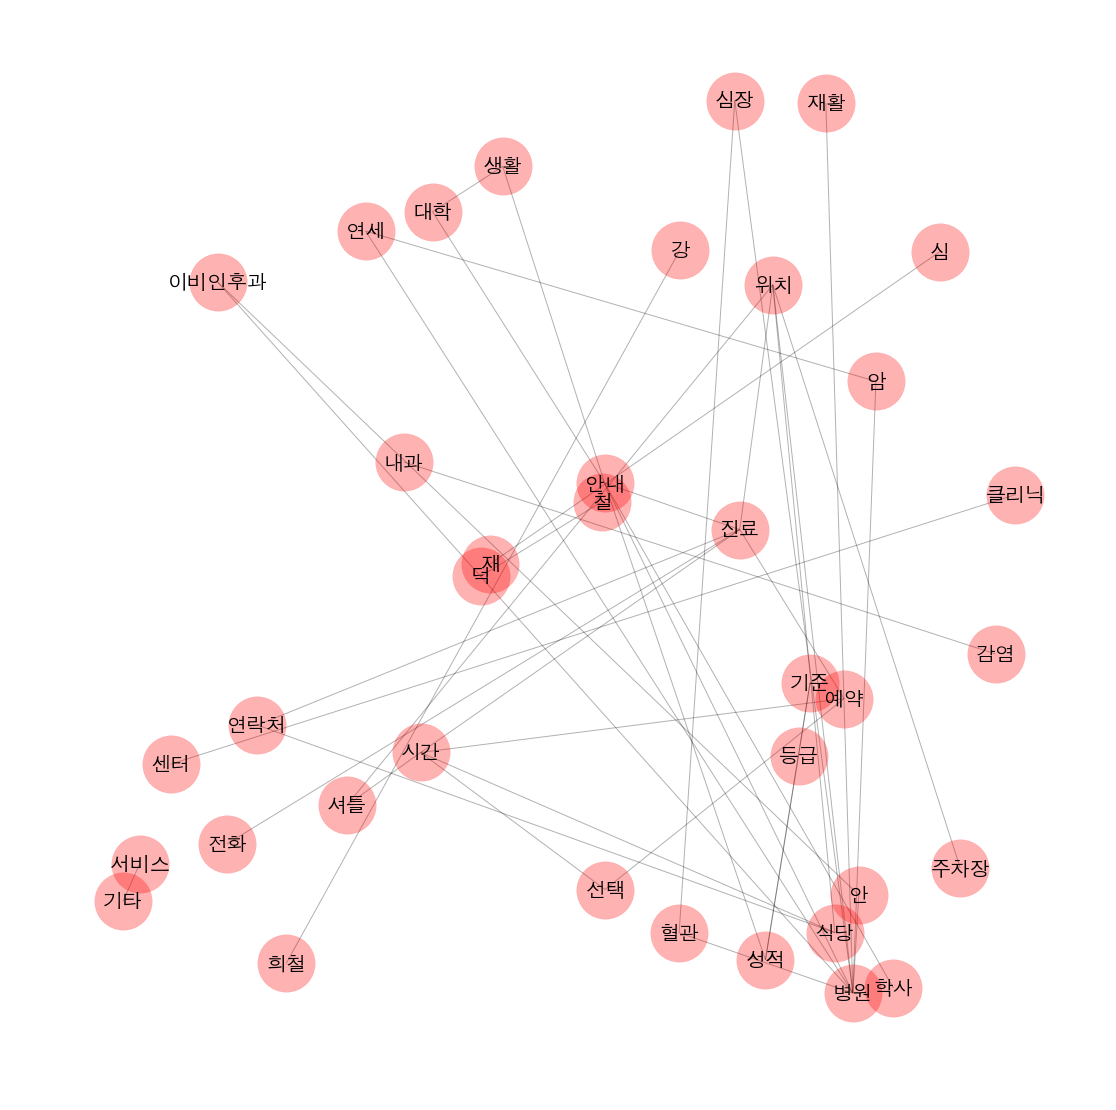

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 20:
            graph.add_edge(unique_nouns[i], unique_nouns[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 15))										# 사이즈는 (15,15)로 설정한다
layout = nx.random_layout(graph)								# random_layout
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()





c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



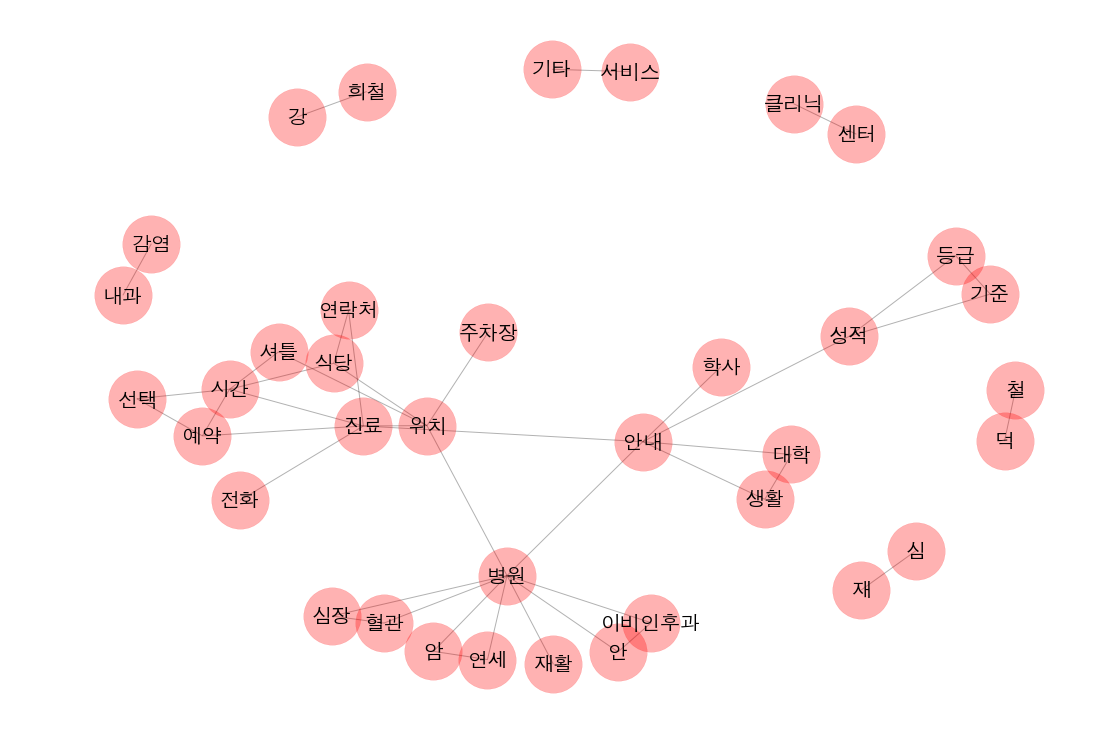

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 20:
            graph.add_edge(unique_nouns[i], unique_nouns[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 10))										# 사이즈는 (15,10)로 설정한다
layout = nx. spring_layout(graph, k=.1)								# spring_layout을 적용한다 
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()

<a id='the_destination26'></a>
## 3.2 TWITTER

<a id='the_destination27'></a>
### 3.2.1 TWITTER 형태소 분석

In [186]:
#2.1에서 dff 데이터 사용 예정


lines = list(dff)  ##################################################  dff 리스트화하고 lines이라 칭함

sentences = [line for line in lines if line != '']   ############### 빈 문장 제거 후 sentences라 칭함


for line in lines[:3]:
    if line != '':
        print(line)

from konlpy.tag import Twitter
tagger = Twitter()
tags = tagger.pos(sentences[0])

tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences

주차장 위치
눈이 아파
정시 경쟁률보기


[[('주차장', 'Noun'), ('위치', 'Noun')],
 [('눈', 'Noun'), ('이', 'Josa'), ('아파', 'Adjective')],
 [('정시', 'Noun'), ('경쟁률', 'Noun'), ('보기', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('셔틀', 'Noun'), ('시간', 'Noun')],
 [('2', 'Number'), ('호선', 'Noun'), ('잠실역', 'Noun')],
 [('안녕', 'Noun')],
 [('안녕', 'Noun')],
 [('진료', 'Noun'), ('연락처', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('대학', 'Noun'), ('안내', 'Noun')],
 [('식당', 'Noun'), ('연락처', 'Noun')],
 [('생활관', 'Noun'), ('식당', 'Noun')],
 [('시험', 'Noun')],
 [('감염', 'Noun'), ('내과', 'Noun')],
 [('위치', 'Noun')],
 [('병원', 'Noun'), ('안내', 'Noun')],
 [('위치', 'Noun')],
 [('병원', 'Noun')],
 [('종양', 'Noun'), ('내과', 'Noun'), ('위치', 'Noun')],
 [('무엇', 'Noun'), ('을', 'Josa')],
 [('챗봇', 'Noun'),
  ('으로', 'Josa'),
  ('무엇', 'Noun'),
  ('을', 'Josa'),
  ('할', 'Verb'),
  ('수', 'Noun'),
  ('있', 'Adjective'),
  ('나요', 'Eomi'),
  ('?', 'Punctuation')],
 [('챗봇', 'Noun')],
 [('진료', 'Noun'), ('안내', 'Noun')],
 [('진료', 'Noun'), ('예약', 'Noun')],
 [('2', 'Number'), ('.', 'Pun

<a id='the_destination28'></a>
### 3.2.2 TWITTER 명사 추출

In [187]:
# 명사 리스트 만들어 보기 / 태그가 NNP, NNG로 시작하는 명사를 리스트
noun_listt = []

for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['Noun']:
            noun_listt.append(word)
noun_listt[:10]



['주차장', '위치', '눈', '정시', '경쟁률', '보기', '대학', '안내', '셔틀', '시간']

<a id='the_destination29'></a>
### 3.2.3 TWITTER 명사 빈도수 추출

In [188]:
# collection library를 이용하여 빈도수 계산하기
from collections import Counter

noun_countss = Counter(noun_listt)
noun_countss.most_common(50)

[('진료', 1426),
 ('안내', 1063),
 ('위치', 689),
 ('예약', 571),
 ('병원', 537),
 ('예', 501),
 ('대학', 456),
 ('가정의학', 441),
 ('시간', 407),
 ('식당', 401),
 ('성적', 169),
 ('세브란스병원', 127),
 ('전화번호', 116),
 ('주차장', 110),
 ('월', 102),
 ('병리', 97),
 ('병동', 97),
 ('덕철', 93),
 ('셔틀', 90),
 ('처음', 86),
 ('하이', 84),
 ('연락처', 79),
 ('생활', 67),
 ('내과', 66),
 ('호선', 64),
 ('정보', 53),
 ('경쟁률', 51),
 ('보기', 51),
 ('센터', 50),
 ('재활', 49),
 ('강희', 49),
 ('철', 49),
 ('클리', 46),
 ('닉', 46),
 ('의료', 45),
 ('진', 42),
 ('감염', 41),
 ('심장', 39),
 ('알려줭', 38),
 ('소개', 37),
 ('기타', 37),
 ('상세', 36),
 ('방가', 35),
 ('어린이병원', 35),
 ('서비스', 32),
 ('시험', 31),
 ('안녕', 30),
 ('선택', 30),
 ('외과', 29),
 ('뭐', 29)]

<a id='the_destination30'></a>
### 3.2.4 TWITTER 시각화

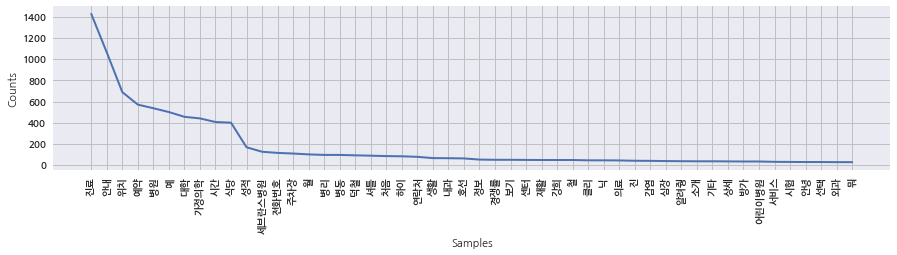

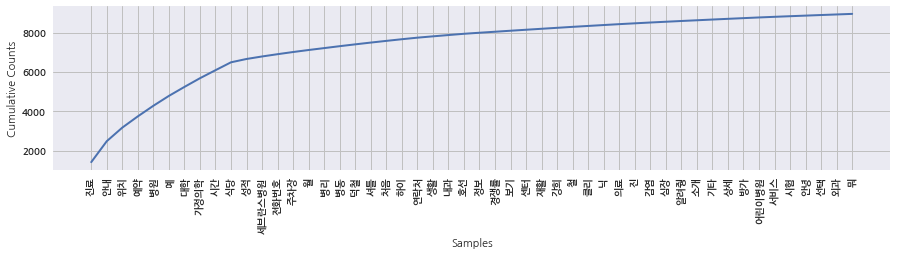

In [189]:
import nltk
import matplotlib.pyplot as plt # 결과를 시각화 하기 위한 matplotlib
%matplotlib inline

# word index 대신 word를 보여주는 그래프
freqdist = nltk.FreqDist(noun_countss)

plt.figure(figsize=(15,3))
freqdist.plot(50)

plt.figure(figsize=(15,3))
freqdist.plot(50,cumulative=True)

<a id='the_destination31'></a>
### 3.2.5 Unique한 명사 리스트 만들기

In [190]:
# unique한 명사 리스트 만들기

unique_nounss = set()
unique_listt = []

for sent in tagged_sentences:
    for word, tag in sent:
        if tag in ['Noun']:
            if word not in unique_listt:
                unique_listt.append(word)
                
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['Noun']:
            unique_nounss.add(word)

unique_nounss = list(unique_nounss)
noun_index = {noun: i for i, noun in enumerate(unique_nounss)} # 딕셔너리 형태의 자료구조
noun_index


{'가야': 127,
 '가이드': 205,
 '가정': 194,
 '가정의학': 268,
 '간': 40,
 '감': 237,
 '감기': 331,
 '감사': 334,
 '감염': 112,
 '갑상선': 73,
 '강희': 129,
 '개': 2,
 '개발': 286,
 '객실': 125,
 '거': 332,
 '검': 258,
 '것': 277,
 '경고': 358,
 '경쟁률': 147,
 '고랑': 3,
 '곧': 337,
 '공': 201,
 '공고': 299,
 '관리': 114,
 '광화문역': 170,
 '교직원': 202,
 '교통': 275,
 '구성': 312,
 '굿잡': 16,
 '귀가': 340,
 '그라드': 223,
 '기간': 0,
 '기능': 341,
 '기준': 100,
 '기타': 261,
 '길': 347,
 '길음역': 57,
 '나': 164,
 '나이': 78,
 '날씨': 179,
 '날짜': 96,
 '남자': 210,
 '내과': 251,
 '내일': 236,
 '너': 139,
 '너그': 328,
 '너무': 207,
 '넌': 94,
 '네': 70,
 '노': 153,
 '노년': 105,
 '노래': 90,
 '놈': 12,
 '누가': 27,
 '누구': 162,
 '눈': 123,
 '눈온': 230,
 '뉴스': 187,
 '니': 56,
 '닉': 133,
 '다나': 55,
 '다이얼로그': 351,
 '달라': 234,
 '담당자': 281,
 '당뇨병': 172,
 '대학': 134,
 '더': 239,
 '덕철': 288,
 '데모': 323,
 '도서관': 31,
 '동문서답': 98,
 '등급': 115,
 '등록': 95,
 '땡큐': 101,
 '똒똑하': 265,
 '라운지': 146,
 '람': 85,
 '레스토랑': 34,
 '렐': 84,
 '로': 156,
 '로우': 292,
 '루': 68,
 '룸': 188,
 '류마티스': 208,
 '리': 10,
 '리바': 2

<a id='the_destination32'></a>
### 3.2.6 문자-단어 행렬
문장 길이 X 명사 종류 matrix 생성

In [191]:
import numpy as np
# 문장 길이 X 명사 종류 matrix 생성
occurss = np.zeros([len(tagged_sentences), len(unique_nounss)])
np.shape(occurss)

(6876, 365)

In [192]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['Noun']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurss[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurss[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

<a id='the_destination33'></a>
### 3.2.7 공존-단어 행렬 계산

In [193]:
# i 번째 단어
co_occurss = occurss.T.dot(occurss)

In [194]:
for i in range(100):
    for j in range(100):
        if (co_occurss[i][j] > 1) & (i>j):
            print(unique_nounss[i], unique_nounss[j], co_occurss[i][j])

종합 부 4.0
이용 보험 6.0
평화 수금 3.0
식당 메뉴 10.0
보기 부 4.0
보기 종합 4.0
보기 정시 8.0
심장 혈관 21.0
심장 소아 18.0
별 보험 6.0
별 이용 6.0
안내 보험 5.0
안내 이용 5.0
안내 및 2.0
안내 별 5.0
언제 식당 4.0
청향 언제 2.0
분야 수금 3.0
분야 평화 3.0
오늘 메뉴 3.0
오늘 식당 4.0
성적 안내 40.0


<a id='the_destination34'></a>
### 3.2.8 네트워크 그래프

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



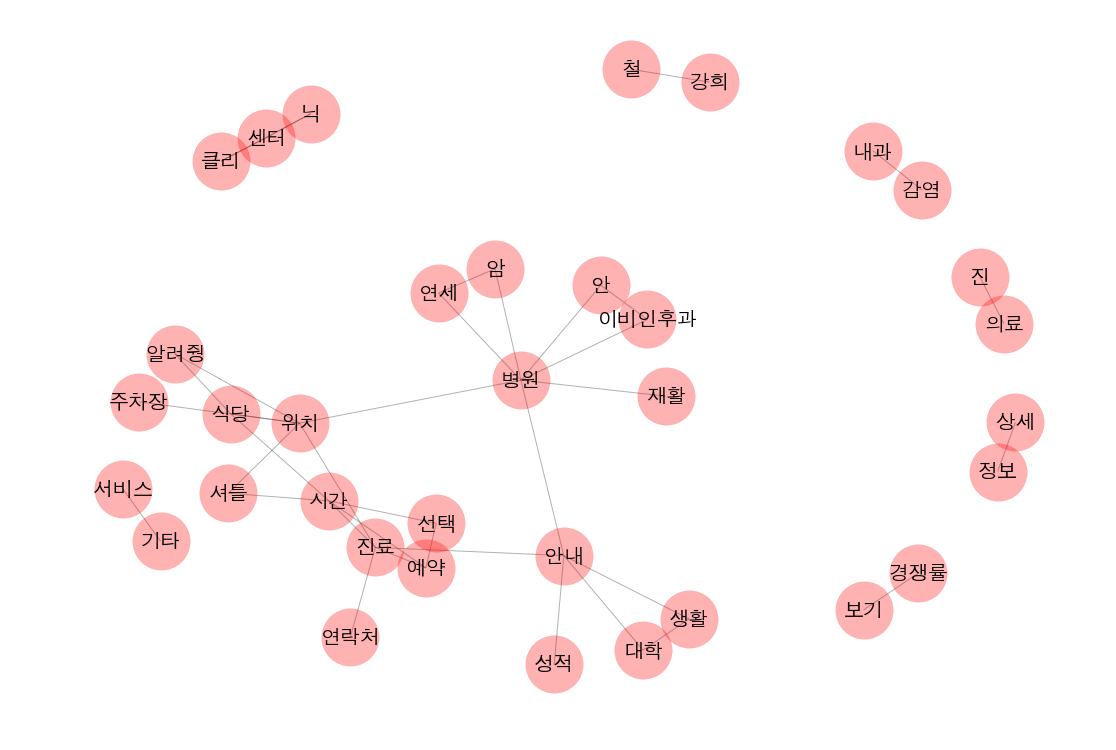

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nounss)):
    for j in range(i + 1, len(unique_nounss)):
        if co_occurss[i][j] > 24:
            graph.add_edge(unique_nounss[i], unique_nounss[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 10))
layout = nx.spring_layout(graph, k=.1)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

c:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



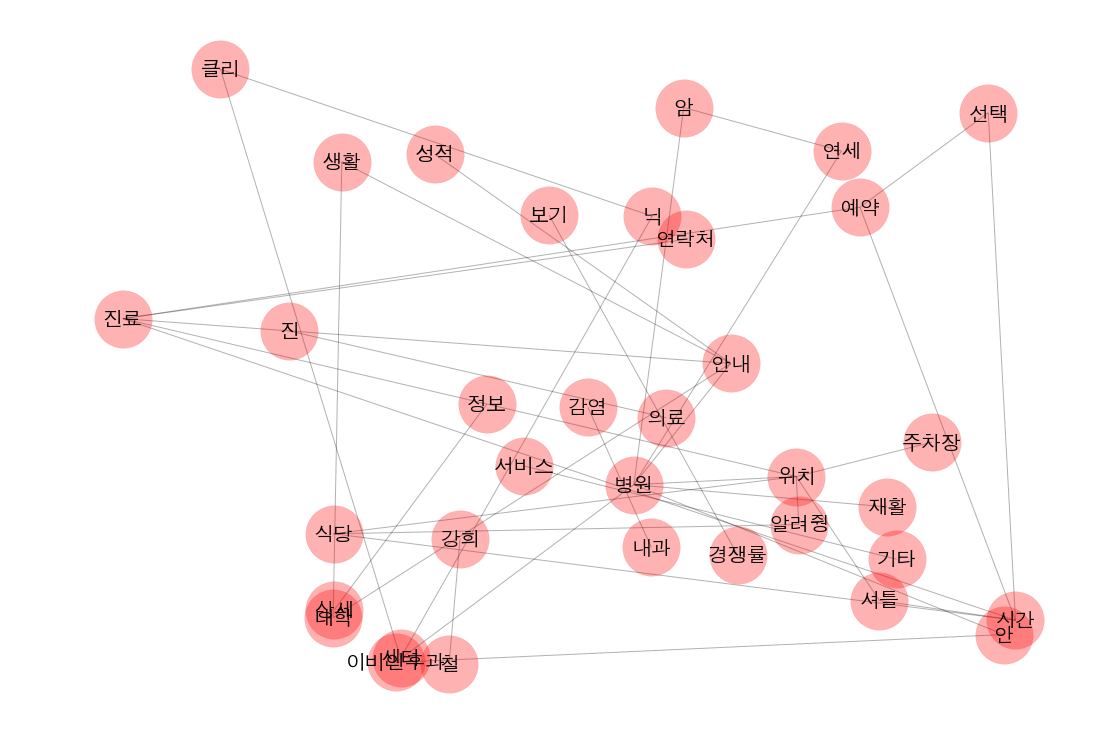

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt


import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nounss)):
    for j in range(i + 1, len(unique_nounss)):
        if co_occurss[i][j] > 24:
            graph.add_edge(unique_nounss[i], unique_nounss[j])
            

krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
plt.rc('font',**krfont)            


plt.figure(figsize=(15, 10))
layout = nx.random_layout(graph)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family='AppleGothic',
        alpha=0.3, node_size=3300)
plt.show()

# 4. Text Mining_감성분석

   ## 4.1 긍부정 트랜드 출력